In [6]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt


from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [7]:
data = load_diabetes()
df = pd.DataFrame(data=np.c_[data['data'], data['target']], columns=data['feature_names'] + ['target'])

In [8]:
Y = load_diabetes().target
X = load_diabetes().data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("X shape: ", X.shape)
print("Y shape :", Y.shape)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape: ", y_train.shape)
print("Y_test shape:", y_test.shape)

train_data = pd.DataFrame(X_train)
train_data['target'] = y_train

X_test = np.array(X_test)
y_test = np.array(y_test)

X shape:  (442, 10)
Y shape : (442,)
X_train shape:  (309, 10)
X_test shape:  (133, 10)
Y_train shape:  (309,)
Y_test shape: (133,)


In [9]:
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,target
0,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064,208.0
1,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907,261.0
2,-0.056370,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020609,0.056912,179.0


# Summarize Model

## MSE

$$ \begin{align*} 

Error &= (Actual Value - Predicted Value) \\
MSE &= \min_{w, b} \sum_{i=1}^n (error)^2 \\
&= \min_{w, b} \sum_{i=1}^n (ActualValue_{y_i} - Predicted \;\; Value_{\hat y_i})^2



\end{align*} $$


## Predictions

$$ Prediction(\hat y_i) = W^TX_i + b $$

## Loss Functions

$$ L(w, b)  \rarr  \min_{w, b} \sum_{i=1}^n (y_i - (W^Tx_i + b))^2 $$

## Gradient Descent

$$ {\partial L(w) \over\partial w} = \sum_{i=1}^n (-2x_i)(y_i - (W^Tx_i + b)) $$

## Update Weights & bias



- weight
$$ r = learning Rate $$
$$ W_{j+1} = w_j - r ({\partial L \over\partial w})_{w_j} $$

- bias 
$$ \begin{align*} 
{\partial L \over\partial b} &= \sum_{i=1}^n (-2)(y_i - (W^Tx_i + b)) \\ 
b_{j+1} &= b_j - r ({\partial L \over\partial w})_{b_j}

\end{align*}$$

---

## Regression Model Implementation with GD

In [10]:
def customGD(train_data, learning_rate, n_iter, k, divideby):
    
    # Initailzie Weights and Bias per Training Data
    w = np.zeros(shape=(1, train_data.shape[1] - 1))
    b = 0
    
    cur_iter = 1
    while(cur_iter <= n_iter):
        
        # Data load of size K
        temp = train_data.sample(k)
        
        # create X, y dataset from temp
        y = np.array(temp['target'])
        x = np.array(temp.drop('target', axis=1))
        
        #  initial gradients
        w_gradient = np.zeros(shape=(1, train_data.shape[1] - 1))
        b_gradient = 0
        
        # Calculating gradeints for point in our K sized Dataset
        for i in range(k):
            prediction = np.dot(w, x[i])  + b
            w_gradient = w_gradient+(-2) * x[i] * (y[i] - (prediction))
            b_gradient = b_gradient+(-2) * (y[i] - (prediction))
        
        # updating weights and bias
        w = w - learning_rate * (w_gradient / k)
        b = b - learning_rate * (b_gradient / k)
        
        # Incrementing the iteration value
        cur_iter += 1
        
        # Dividing learing rate by specified value
        learning_rate = learning_rate / divideby
        
    return w, b

In [11]:
def predict(x, w, b):
    y_pred = []
    for i in range(len(x)):
        y = np.asscalar(np.dot(w, x[i]) + b)
        y_pred.append(y)
    
    return np.array(y_pred)

In [12]:
def MSE(actual_value, predicted_value):
    return np.square(np.subtract(actual_value, predicted_value)).mean()

Best learing rate: 0.1, Best n_iter: 2000
Best MSE is 2859.11


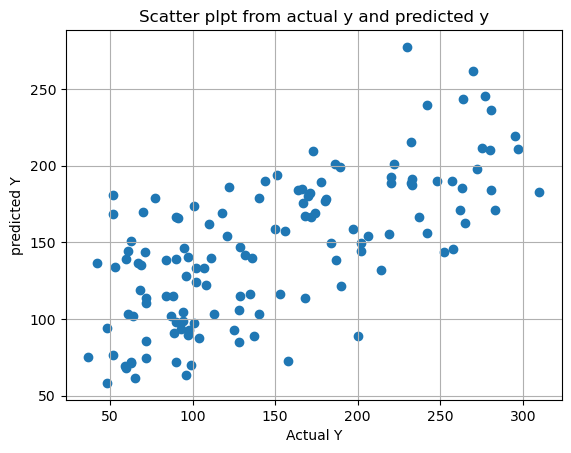

In [101]:
from itertools import product
params = [
    [0.1, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.005], # learing rate
    [100, 200, 300, 400, 500, 1000, 2000] # n_iter
]

combinations = list(product(*params))

best_params = []
scores = []
for i, value in enumerate(combinations):
    temp += value
    w, b = customGD(train_data=train_data, learning_rate=temp[i], n_iter=temp[i+1], divideby=1, k=10)
    y_pred_customGD = predict(X_test, w, b)
    mse = MSE(y_test, y_pred_customGD)
    if mse < 3000:
        print("Best learing rate: {}, Best n_iter: {}".format(temp[i], temp[i+1]))
        print("Best MSE is {0:0.2f}".format(mse))
        plt.scatter(y_test, y_pred_customGD)
        plt.grid()
        plt.xlabel('Actual Y')
        plt.ylabel('predicted Y')
        plt.title('Scatter plpt from actual y and predicted y')
        plt.show()